# Deteksi Plat Nomor Kendaraan
<ul>
<li>1119010 - Nealson William </li>
<li>1119036 - Hans Patrick Eko Prasetyo </li>
<li>1119039 - Pierre Sebastian Hadi Bangun </li>
<li>1119045 - Rafael Christo Gracia </li>
<li>1119049 - Andreas Stefanus Sibarani </li>
</ul>

Sauce : https://pyimagesearch.com/2015/03/23/sliding-windows-for-object-detection-with-python-and-opencv/<br>
Sauce : https://www.youtube.com/watch?v=NApYP_5wlKY

In [309]:
# import library yang dibutuhkan critanya
import cv2 as cv
import imutils as im
import numpy as np
import matplotlib.pyplot as plt
import easyocr

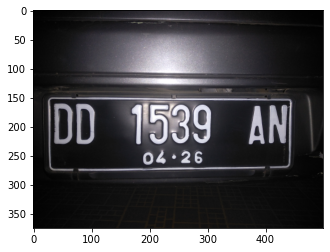

In [310]:
image = cv.imread('image_8.jpg')
image = im.resize(image, width=500 )
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

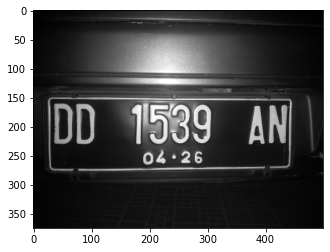

In [311]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(cv.cvtColor(gray_image, cv.COLOR_BGR2RGB))

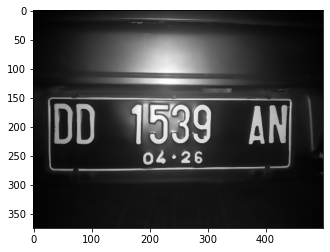

In [312]:
# Noise reduction dan Smoothing Image
smoothing_image = cv.bilateralFilter(gray_image, 11, 17, 17) 
plt.imshow(cv.cvtColor(smoothing_image, cv.COLOR_BGR2RGB))


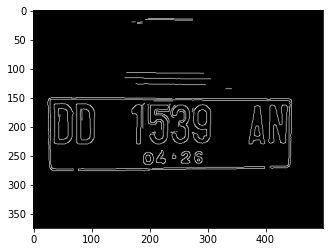

In [313]:
# Edge Detection dengan metode Canny
edged = cv.Canny(smoothing_image, 200, 300)
plt.imshow(cv.cvtColor(edged, cv.COLOR_BGR2RGB))

In [314]:
keypoints = cv.findContours(edged.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours = im.grab_contours(keypoints)
contours = sorted(contours, key=cv.contourArea, reverse=True)[:10]

In [315]:
location = None
for contour in contours:
    approx = cv.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [316]:
location

array([[[ 37, 161]],

       [[ 36, 228]],

       [[ 54, 230]],

       [[ 69, 176]]], dtype=int32)

In [317]:
mask = np.zeros(gray_image.shape, np.uint8)
new_image = cv.drawContours(mask, [location], 0,255, -1)
new_image = cv.bitwise_and(image, image, mask=mask)

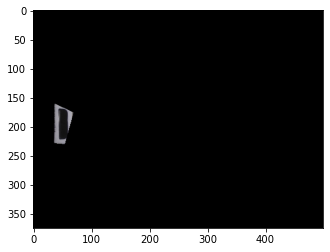

In [318]:
plt.imshow(cv.cvtColor(new_image, cv.COLOR_BGR2RGB))

In [319]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray_image[x1:x2+1, y1:y2+1]

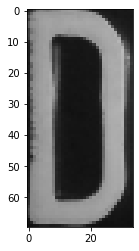

In [320]:
plt.imshow(cv.cvtColor(cropped_image, cv.COLOR_BGR2RGB))

In [321]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 0], [34, 0], [34, 69], [0, 69]], '0', 0.6643604378830936)]

0 


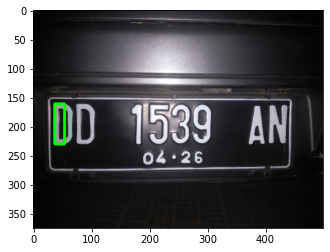

In [322]:
index = 0
text = ""
for value in result:
    text += result[index][-2] + " "
    index+=1
font = cv.FONT_HERSHEY_SIMPLEX
print(text)
res = cv.rectangle(image, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))